# Projekat klasifikacije tipa đubriva

Cilj mog projekta je predvižanje tipa đubriva koji se treba koristiti na osnovu tipa zemljišta i tipa biljke koji se koriste za uzgoj. Dataset sadrži 7 kategorija tipa đubriva:
* 10-26-26
* 14-35-14
* 17-17-17
* 20-20
* 28-28
* DAP
* Urea


Za određivanje potrebnog tipa đubriva koriste se parametri:
* Temperatura
* Vlažnost
* Hidratacija zemljišta
* Tip zemljišta
* Tip biljke koja se sadi
* Količina azota
* Količina kalijuma
* Količina fosfora


In [21]:
import pandas as pd
from itertools import product
import crop_dataset_columns as cols
import matplotlib.pyplot as plt
import seaborn as sns
import ipdb


url = '/home/nikolastojiljkovic/Podaci/fakultet/ML/Project 1/crops/data_core.csv'

dataframe_crops = pd.read_csv(url)




print('Crops dataframe dimension is ' + str(dataframe_crops.shape))
dataframe_crops.head(5)

Crops dataframe dimension is (8000, 9)


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


Kao što vidimo, ova tabela ima 8000 redova i 9 kolona.

In [22]:
dataframe_crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


Kolone u datasetu nam govore da od ulaznih parametara posedujemo numeričke podatke u svim kolonama osim u kolonama "Soil type" i "Crop type" koji su kategorički podaci.  

In [23]:
duplicates = list(filter(lambda x: x == True, dataframe_crops.duplicated()))
print(f"Number of duplicates is {len(duplicates)}")


dataframe_crops.groupby([cols.CROP_TYPE_COLUMN, cols.FERTILIZER_NAME_COLUMN]).count()

negatives = dataframe_crops[dataframe_crops["Potassium"] < 0]

Number of duplicates is 0


Naš dataset ne poseduje duplikate, pa nećemo imati potrebe za uklanjamo kolone koje su duplirane.

             Temparature  Humidity  Moisture  Nitrogen  Potassium  Phosphorous
Temparature     1.000000  0.525594  0.067963 -0.028978  -0.031322     0.166951
Humidity        0.525594  1.000000  0.066713 -0.042701   0.005695     0.136216
Moisture        0.067963  0.066713  1.000000 -0.085016   0.023618     0.011854
Nitrogen       -0.028978 -0.042701 -0.085016  1.000000  -0.445762    -0.635694
Potassium      -0.031322  0.005695  0.023618 -0.445762   1.000000     0.056225
Phosphorous     0.166951  0.136216  0.011854 -0.635694   0.056225     1.000000


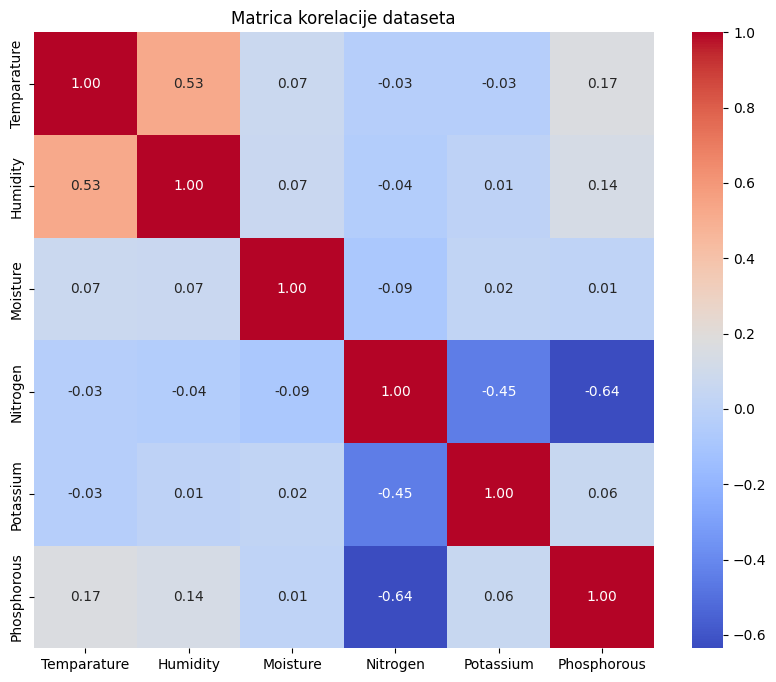

In [24]:
matrix = dataframe_crops.select_dtypes(include="number").corr()

print(matrix)

plt.figure(figsize=(10, 8))

sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matrica korelacije dataseta')
plt.show()

In [25]:
dataframe_crops[cols.FERTILIZER_NAME_COLUMN] = (
    dataframe_crops[cols.FERTILIZER_NAME_COLUMN]
    .astype(str)
    .map(cols.fertilizer_groupation)
)
dataframe_crops.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Nitrogenous
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,Phosphatic
2,34.0,65.0,62.0,Black,Cotton,7,9,30,NPK Complex
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,High-N/P
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Nitrogenous


Možemo videti da imamo 7 klasa i da za svaku klasu postoje 1000 redova u datasetu koji daju rezultat klase. Da bismo probali da povećamo broj reprezentativnih redova u datasetu za klasu, možemo da smanjimo broj klasa tako što ćemo ih grupisati u 4 klase prema pravilu:
    * "10-26-26": "NPK Complex"
    * "14-35-14": "NPK Complex"
    * "17-17-17": "NPK Complex"
    * "20-20": "High-N/P"
    * "28-28": "High-N/P"
    * "DAP": "Phosphatic"
    * "Urea": "Nitrogenous"


Gde smo kreirali klase đubriva sa visokim nivoom fosfora, azota, visokim nivoom i fosfora i azota, i NPK complex (Đubriva koja sadrže i visok nivo azota, i fosfora i kalijuma)

In [26]:
dataframe_crops.groupby([cols.FERTILIZER_NAME_COLUMN]).count()


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
Fertilizer Name,,,,,,,,
High-N/P,2223,2223,2223,2223,2223,2223,2223,2223
NPK Complex,3440,3440,3440,3440,3440,3440,3440,3440
Nitrogenous,1170,1170,1170,1170,1170,1170,1170,1170
Phosphatic,1167,1167,1167,1167,1167,1167,1167,1167


Grupisanjem klasa u manji broj smo izgubili balansiranost dataseta, pa ćemo morati da odradimo balansiranje.

In [27]:
# Check duplicates
print(list(filter(lambda x: x is not False, dataframe_crops.duplicated())))

[]


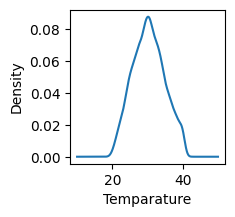

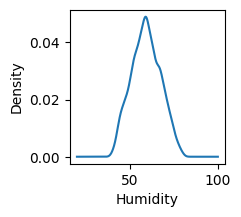

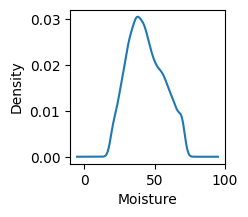

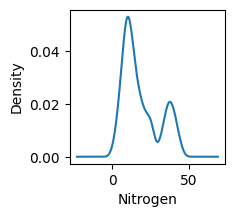

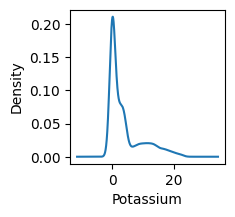

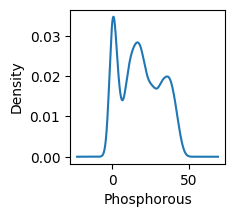

In [28]:
import pandas.api.types as ptypes

# create dataframe out of any column
dataframes_per_column: list[pd.DataFrame] = []
a = cols.column_list
for column in cols.column_list:
    dataframes_per_column.append(dataframe_crops[column])
    
for df, column in zip(dataframes_per_column, cols.column_list):
    if ptypes.is_numeric_dtype(df.dtype):  
        plt.figure(figsize=(2,2))
        
        df.plot(kind='density')
        plt.xlabel(column)
    




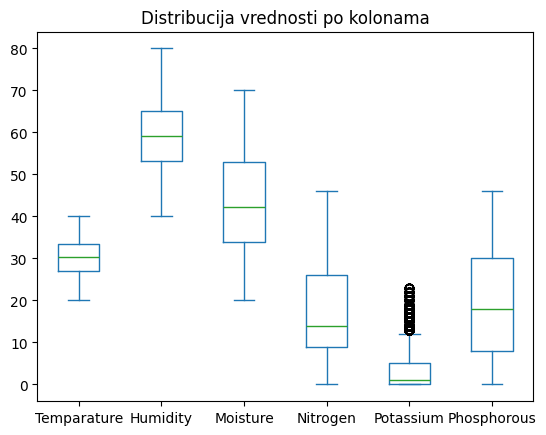

In [29]:
dataframe_crops.plot(kind="box", title="Distribucija vrednosti po kolonama")
plt.show()

Here we can see that on Potassium column we have outlier values. This means that we should manage them before scaling values.

Možemo videti da kolona za količinu kalijuma poseduje outlier-e. Ovo znači da moramo da ih obradimo. Kako naš dataset nema veliki broj redova, outlier-i su obrađeni tako što će uzeti gornju vrednost IQR granice.

10.0


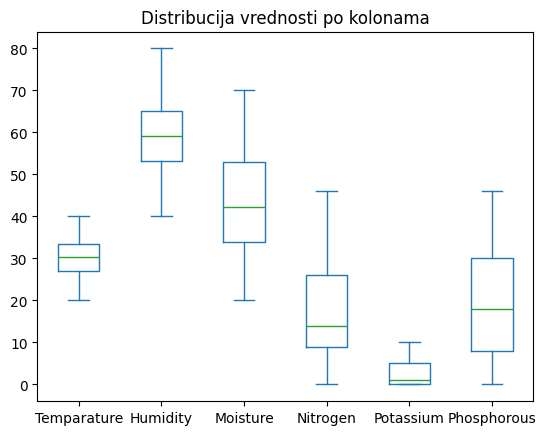

In [30]:
# Calculating IQR value
quantile_q1 = dataframe_crops[cols.POTASSIUM_COLUMN].quantile(0.25)
quantile_q2 = dataframe_crops[cols.POTASSIUM_COLUMN].quantile(0.75)
iqr = quantile_q2 - quantile_q1

quantile_top_margin_value = quantile_q2 + iqr
print(quantile_top_margin_value)
# assign top margin value for outlier columns
dataframe_crops[cols.POTASSIUM_COLUMN].mask(dataframe_crops[cols.POTASSIUM_COLUMN] > quantile_top_margin_value, quantile_top_margin_value, inplace = True)

dataframe_crops.plot(kind="box", title="Distribucija vrednosti po kolonama")
plt.show()

Kako smo uklonili outlier-e, možemo krenuti sa balansiranjem dataseta.

             Temparature  Humidity  Moisture  Nitrogen  Potassium  Phosphorous
Temparature     1.000000  0.525594  0.067963 -0.028978  -0.012350     0.166951
Humidity        0.525594  1.000000  0.066713 -0.042701   0.019225     0.136216
Moisture        0.067963  0.066713  1.000000 -0.085016   0.052445     0.011854
Nitrogen       -0.028978 -0.042701 -0.085016  1.000000  -0.466244    -0.635694
Potassium      -0.012350  0.019225  0.052445 -0.466244   1.000000     0.103984
Phosphorous     0.166951  0.136216  0.011854 -0.635694   0.103984     1.000000


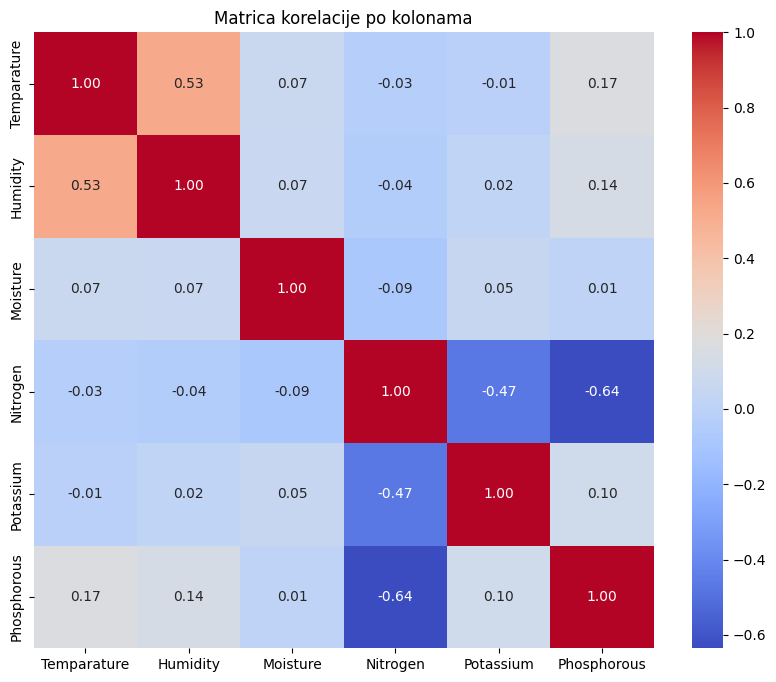

In [31]:
matrix = dataframe_crops.select_dtypes(include='number').corr()

print(matrix)

plt.figure(figsize=(10, 8))

sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matrica korelacije po kolonama')
plt.show()

# Balansiranje dataseta


Naš dataset poseduje 1000-3000 reprezentativnih redova po klasi, što znači da zbog male brojnosti podataka u datasetu ne možemo odraditi balansiranje uklanjanjem podataka. Takođe, dupliranjem podataka ćemo modifikovati raspodelu podataka povećavanjem vrednosti na tačno određene vrednosti. Ovo znači da treba da nađemo algoritam koji će na osnovu postojećih podataka u datasetu generisati nove. Upotrebljena je SMOTE tehnika generisanja podataka.

In [32]:
from balancer import balance_SMOTENC
from sklearn.model_selection import train_test_split



y = dataframe_crops[cols.FERTILIZER_NAME_COLUMN]
X = dataframe_crops.drop(columns=[cols.FERTILIZER_NAME_COLUMN])

X_train: pd.DataFrame
X_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=1066
)


feature_column_list = list(
    filter(lambda column: column != cols.FERTILIZER_NAME_COLUMN, cols.column_list)
)
target_column = cols.FERTILIZER_NAME_COLUMN
# dataframe_crops = balance_SMOTENC(df = dataframe_crops, feature_columns = cols.column_list, target_column = target_column)


# # get numerical and categorical features
# crops_features_dataframe = X_train[feature_column_list].copy()
# get_loc_of_column = lambda column: crops_features_dataframe.columns.get_loc(column)

# categorical_features = list(
#     map(
#         get_loc_of_column,
#         filter(
#             lambda column: ptypes.is_object_dtype(X_train[column].dtype),
#             feature_column_list,
#         ),
#     )
# )


# X_train, y_train = balance_SMOTENC(
#     X_train,
#     y_train,
#     feature_columns=feature_column_list,
#     target_column=target_column,
#     categorical_features=categorical_features,
# )

# y_train.value_counts()


# Box grafik balansiranog dataseta

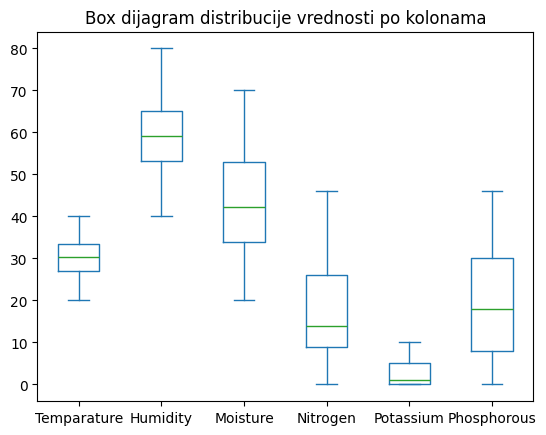

In [33]:

dataframe_crops.plot(kind="box", title="Box dijagram distribucije vrednosti po kolonama")

plt.show()

### Histogram raspodele vrednosti po kolonama

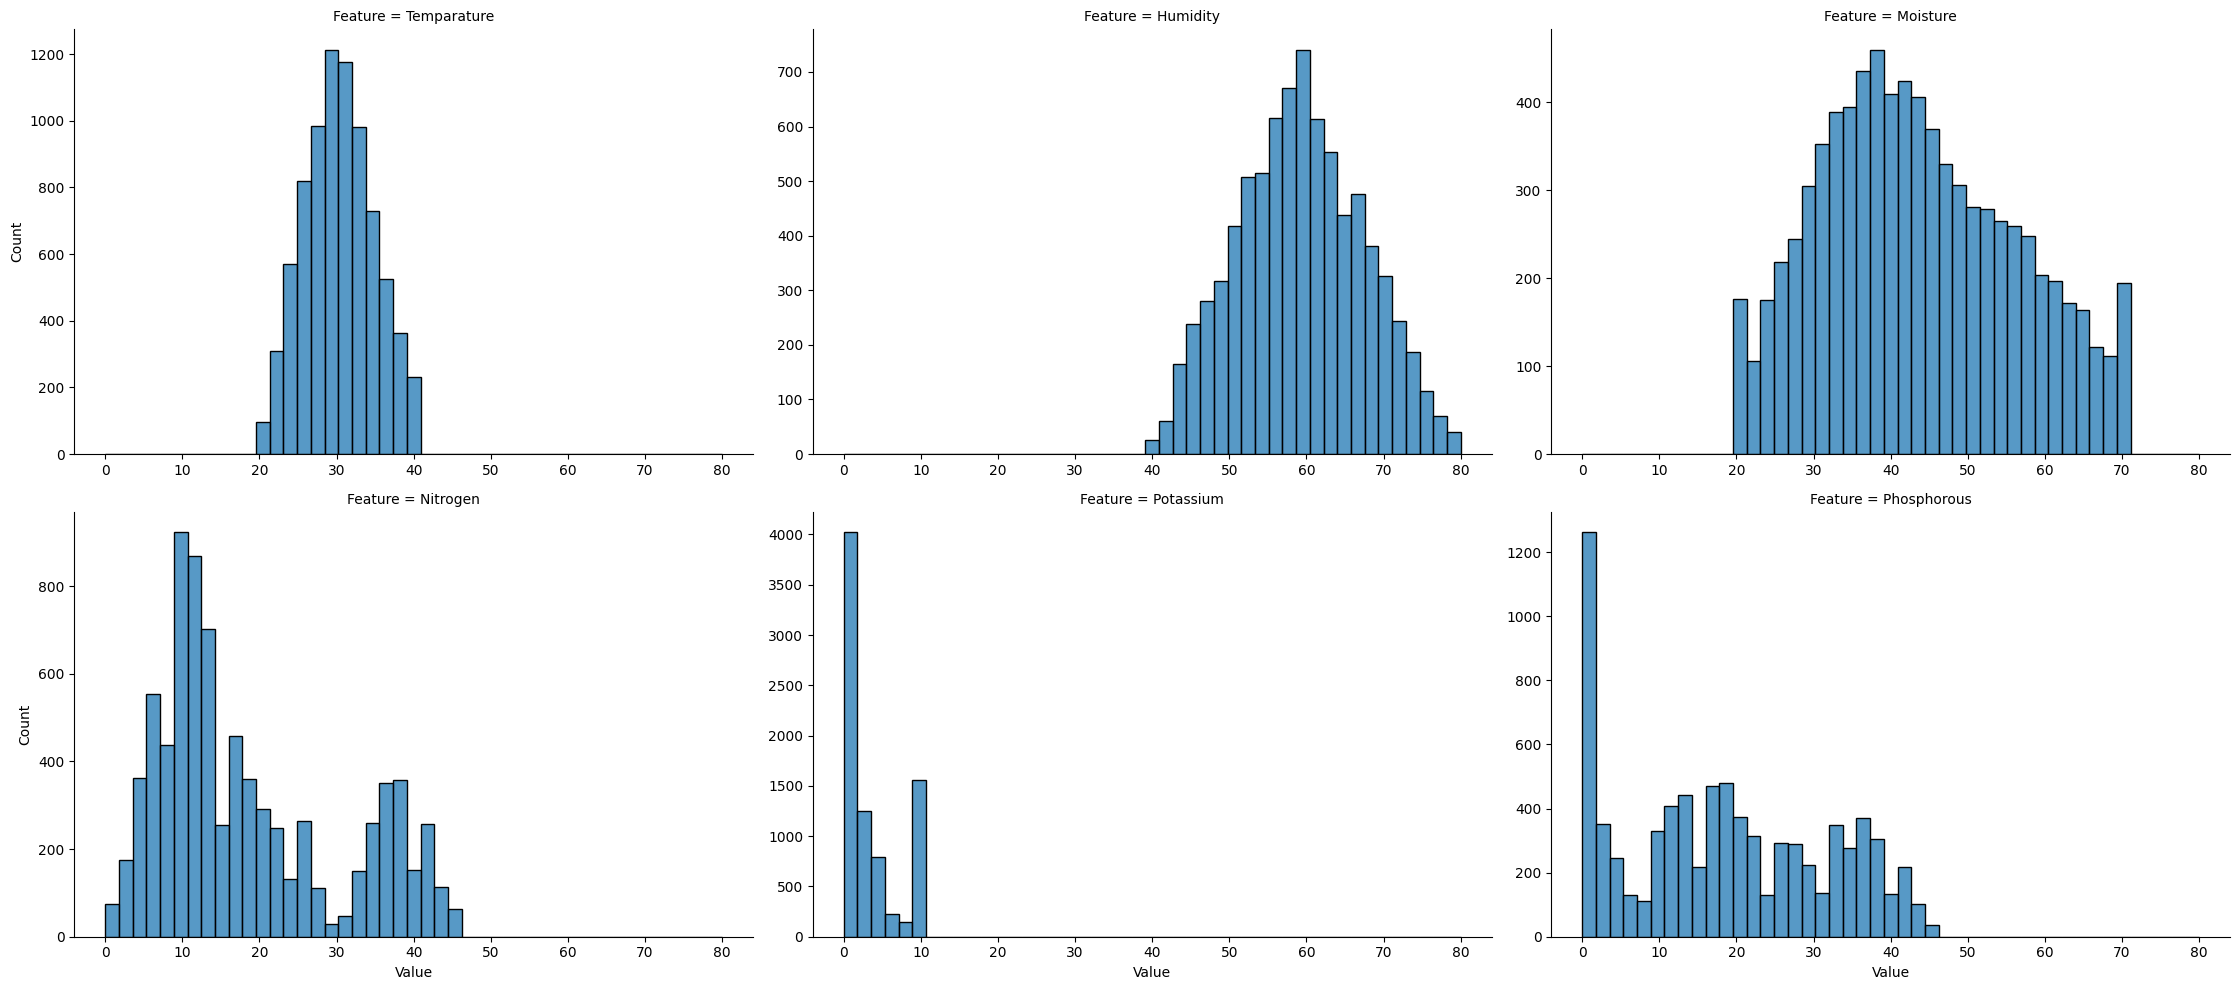

In [34]:
df_long = dataframe_crops.melt(
    value_vars = cols.numerical_input_columns, 
    var_name = 'Feature', 
    value_name = 'Value'
)

g = sns.displot(
    data=df_long, 
    x='Value', 
    col='Feature', 
    kind='hist', 
    kde=False,      # <--- Change this to False
    col_wrap=3,
    aspect=1.5,
    facet_kws={'sharex': False, 'sharey': False}
)

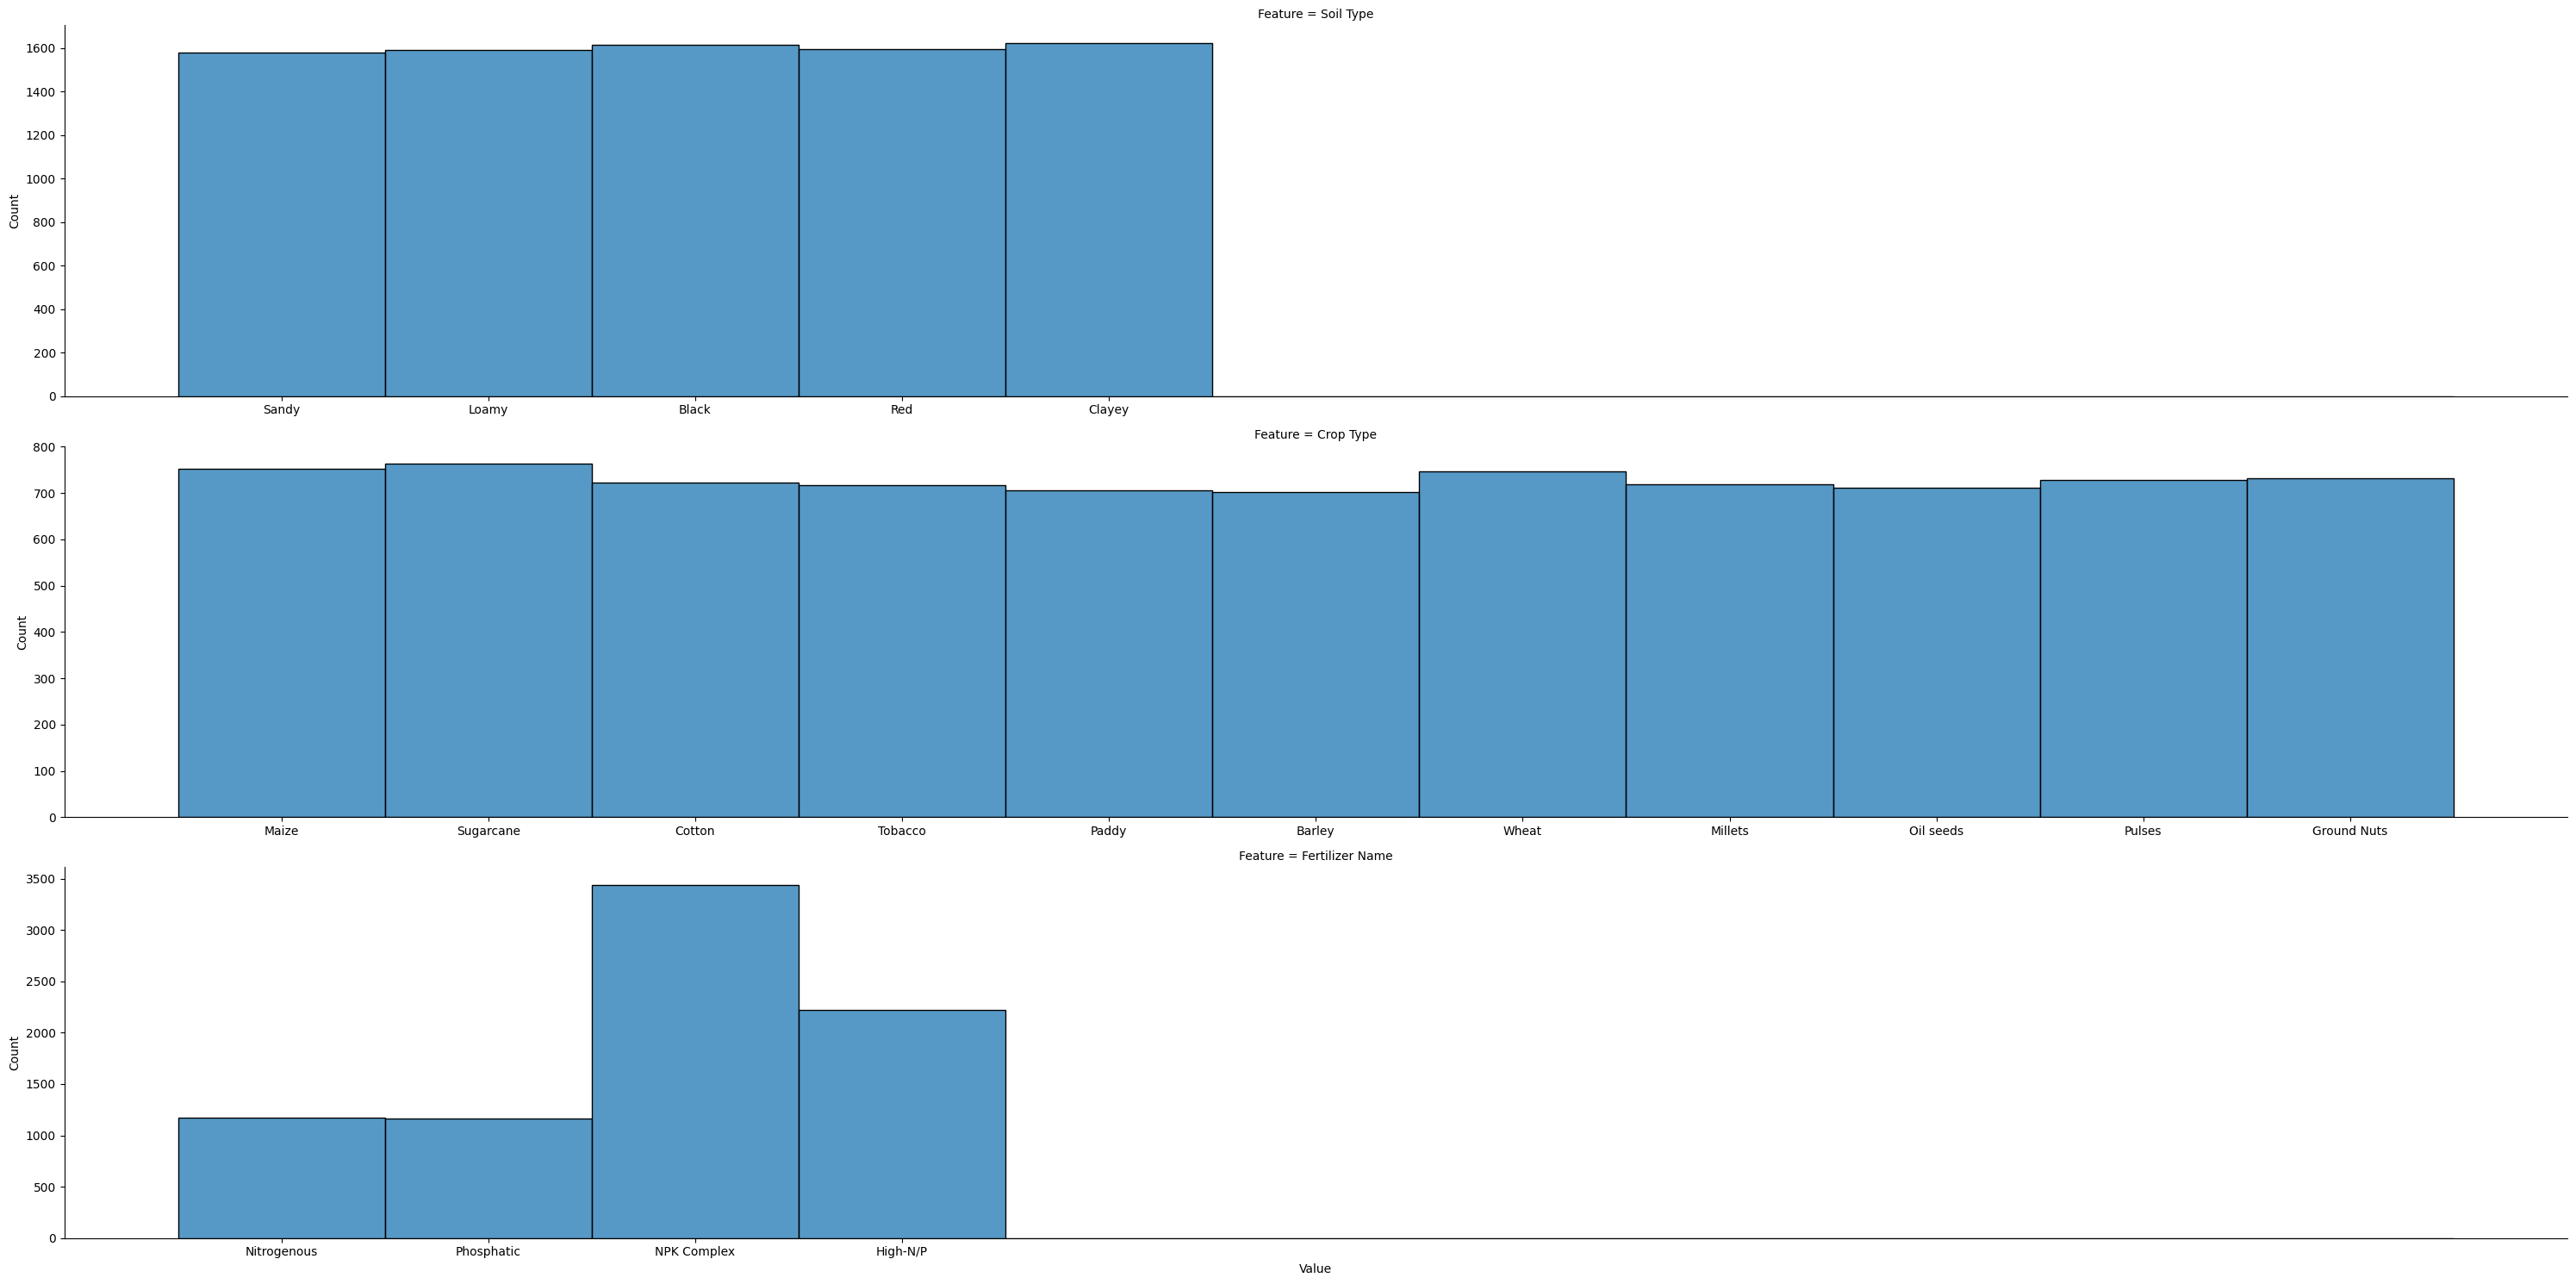

In [35]:
df_categorical_long = dataframe_crops.melt(
    value_vars = cols.categorical_input_columns + [cols.FERTILIZER_NAME_COLUMN], 
    var_name = 'Feature', 
    value_name = 'Value'
)

g = sns.displot(
    data=df_categorical_long, 
    x='Value', 
    col='Feature', 
    kind='hist', 
    kde=False,      # <--- Change this to False
    col_wrap=1,
    aspect=6,
    facet_kws={'sharex': False, 'sharey': False}
)

## Skaliranje dataseta i razdvajanje na trening i test podatke



Prvo se radi razdvajanje podataka na trening i test podatke, pa onda skaliranje.

In [36]:
from sklearn.preprocessing import StandardScaler



drop_categorical_input_columns = lambda df, columns: df.drop(columns, axis=1)

# lambda which performs train and fit, keep in mind about types of columns, they must all be numeric or all categorical
transform_lambda = lambda scaler, df, cols: scaler.transform(df[cols])
fit_lambda = lambda scaler, df, cols: scaler.fit(df[cols])


standard_scaler = StandardScaler()

standard_scaler.fit(X_train[cols.numerical_input_columns])
X_train[cols.numerical_input_columns] = standard_scaler.transform(X_train[cols.numerical_input_columns])
X_test[cols.numerical_input_columns] = standard_scaler.transform(X_test[cols.numerical_input_columns])

X_train_numerical_scaled_df = pd.DataFrame(
    X_train[cols.numerical_input_columns], columns=X_train[cols.numerical_input_columns].columns,
    index = X_train.index
)
X_test_numerical_scaled_df = pd.DataFrame(
    X_test[cols.numerical_input_columns], columns=X_test[cols.numerical_input_columns].columns,
    index = X_test.index
)

X_train_numerical_scaled_df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03
mean,-3.343731e-17,1.708437e-16,-3.552714e-16,3.866188e-17,3.813943e-17,8.098097e-17
std,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00
min,-2.312686e+00,-2.349072e+00,-1.876089e+00,-1.551974e+00,-8.208621e-01,-1.397497e+00
25%,-7.296457e-01,-7.284189e-01,-7.620461e-01,-7.926502e-01,-8.208621e-01,-7.946260e-01
50%,-2.551390e-02,-1.345192e-02,-1.053828e-01,-3.708034e-01,-5.577281e-01,-4.103734e-02
75%,6.964864e-01,7.231807e-01,7.426168e-01,6.416290e-01,4.948081e-01,8.632691e-01
max,2.154447e+00,2.530891e+00,2.097668e+00,2.329016e+00,1.810478e+00,2.069011e+00


In [37]:
X_train[cols.numerical_input_columns].head(20)

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
1017,0.019157,0.492487,0.462864,-0.961389,-0.820862,-0.493191
7204,0.389929,-1.077206,0.298351,-0.708281,0.231674,1.013987
1820,-1.267377,-0.065327,-0.043392,1.654061,0.231674,-1.322138
1117,-0.635277,-0.415640,-0.176116,-0.370803,-0.820862,1.390781
1438,1.330261,1.650837,0.237950,0.304152,-0.820862,0.109680
4501,0.367594,-0.011621,-0.894571,1.822800,-0.820862,-1.397497
7353,0.606585,0.425354,1.077207,-0.961389,1.810478,0.637192
6127,0.430134,-0.889233,1.801225,-0.708281,1.021076,0.787910
382,0.787504,-0.029930,-0.658530,-0.623911,0.231674,0.637192
332,1.852915,0.430237,1.219468,-0.708281,-0.820862,1.842934


### Kodiranje katerorijskih vrednosti

Pošto u datasetu nijedna od kolona nema intuitivni poredak po nekom pravilu (Kao na primer ako postoji kategorijski atribut krvni_pritisak=[nizak, srednji, visok], tu postoji poredak), koristićemo one-hot encoding. Kod one-hot encoding-a na osnovu kolone za svaku moguću vrednost se kreira posebna nova kolona čija će vrednost biti 1 ako je data vrednost kolone prisutna ili 0 ako nije.
Na primer ako imamo kolonu "Boja":[crvena, plava, zelena], kreiraće se nove kolone boja_crvena, boja_plava, boja_zelena gde ako red u datasetu ima vrednost "plava" vrednost kolone "boja_plava" biće 1, dok će vrednost ostale dve kolone biti 0.

In [38]:
from sklearn.preprocessing import OneHotEncoder

one_hot: OneHotEncoder = OneHotEncoder(sparse_output=False)

# fit_lambda(one_hot, X_train, cols.categorical_input_columns)
# transform_lambda(one_hot, X_train, cols.categorical_input_columns)
# transform_lambda(one_hot, X_test, cols.categorical_input_columns)
one_hot.fit(X_train[cols.categorical_input_columns])
X_train_encoded = one_hot.transform(X_train[cols.categorical_input_columns])
X_test_encoded = one_hot.transform(X_test[cols.categorical_input_columns])

X_train_categorical_encoded_df = pd.DataFrame(
    X_train_encoded,
    columns=one_hot.get_feature_names_out(cols.categorical_input_columns),
    index=X_train.index,
)
X_test_categorical_encoded_df = pd.DataFrame(
    X_test_encoded,
    columns=one_hot.get_feature_names_out(cols.categorical_input_columns),
    index=X_test.index,
)

X_train_categorical_encoded_df.head(500)

,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,Crop Type_Barley,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
1017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7204,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1820,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1117,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5623,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
862,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2761,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder: LabelEncoder = LabelEncoder()
label_encoder.fit(y_train)
Y_train_encoded = label_encoder.transform(y_train)
Y_test_encoded = label_encoder.transform(y_test)

Y_train_categorical_encoded_df: pd.DataFrame = pd.DataFrame(
    Y_train_encoded,
    index=y_train.index,
)
Y_test_categorical_encoded_df: pd.DataFrame = pd.DataFrame(
    Y_test_encoded,
    index=y_test.index,
)

Y_train_categorical_encoded_df.head(500)

,0
1017,2
7204,2
1820,3
1117,1
1438,3
...,...
1151,0
5623,3
862,3
2761,1


## Treniranje modela

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


import training_params as tp
from sklearn.metrics import accuracy_score, classification_report


X_train_merged = pd.concat(
    [
        X_train_numerical_scaled_df,
        X_train_categorical_encoded_df,
    ],
    axis=1,
)
X_test_merged = pd.concat(
    [
        X_test_numerical_scaled_df,
        X_test_categorical_encoded_df,
    ],
    axis=1,
)

alghoritms = {
    tp.training_kNN: KNeighborsClassifier(n_neighbors=tp.KNN_NEIGHBOURS_COUNT),
    tp.training_decision_tree: DecisionTreeClassifier(
        max_depth=10, class_weight="balanced"
    ),
    "ada": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=5, class_weight="balanced"),
        n_estimators=100,
        learning_rate=0.5,
        random_state=42,
    ),
    # tp.training_SVC: SVC(kernel='linear')
}

X_train_merged.head(500)

for name, trainer in alghoritms.items():
    print(f"\n------------------------------------------------------")
    print(f"{name}\n")
    trainer.fit(X_train_merged, Y_train_categorical_encoded_df)
    y_pred_knn = trainer.predict(X_test_merged)

    print("Accuracy:", accuracy_score(Y_test_categorical_encoded_df, y_pred_knn))
    print(classification_report(Y_test_categorical_encoded_df, y_pred_knn))


------------------------------------------------------
KNN

Accuracy: 0.33416666666666667
              precision    recall  f1-score   support

           0       0.25      0.36      0.30       319
           1       0.44      0.50      0.47       538
           2       0.13      0.05      0.07       184
           3       0.11      0.03      0.05       159

    accuracy                           0.33      1200
   macro avg       0.23      0.24      0.22      1200
weighted avg       0.30      0.33      0.31      1200


------------------------------------------------------
decision_tree

Accuracy: 0.24916666666666668
              precision    recall  f1-score   support

           0       0.27      0.57      0.36       319
           1       0.48      0.12      0.19       538
           2       0.14      0.21      0.17       184
           3       0.13      0.09      0.10       159

    accuracy                           0.25      1200
   macro avg       0.25      0.25      0.21    

/home/nikolastojiljkovic/.local/lib/python3.14/site-packages/sklearn/neighbors/_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nikolastojiljkovic/.local/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
